In [1]:
using Distributions
using QuadGK
using StatsPlots
default(fmt=:png)

function meanvarstdskku(dist)
    m = mean(dist)
    s2 = var(dist)
    s = √s2
    sk = skewness(dist)
    ku = kurtosis(dist)
    m, s2, s, sk, ku
end

function meanvarstdskku(dist::MixtureModel)
    M1, M2, M3, M4 = moment1234(dist)
    m = mean(dist)
    s2 = var(dist)
    s = √s2
    s3, s4 = s*s2, s2^2
    sk = 1/s3 * (M3 - 3m*s2 - m^3)
    ku = 1/s4 * (M4 - 4m*s3*sk - 6m^2*s2 - m^4) - 3
    m, s2, s, sk, ku
end

function moment1234(dist)
    m, s2, s, sk, ku = meanvarstdskku(dist)
    s3, s4 = s*s2, s2^2
    m1 = m
    m2 = s2 + m^2
    m3 = s3*sk + 3m*s2 + m^3
    m4 = s4*(ku + 3) + 4m*s3*sk + 6m^2*s2 + m^4
    m1, m2, m3, m4
end

function moment1234(dist::MixtureModel)
    T = float(eltype(dist))
    M1, M2, M3, M4 = zero(T), zero(T), zero(T), zero(T)
    for (d, q) in zip(components(dist), probs(dist))
        m1, m2, m3, m4 = moment1234(d)
        M1 += q * m1
        M2 += q * m2
        M3 += q * m3
        M4 += q * m4
    end
    M1, M2, M3, M4
end

# Warning: type piracy
Distributions.skewness(dist::MixtureModel) = meanvarstdskku(dist)[4]
Distributions.kurtosis(dist::MixtureModel) = meanvarstdskku(dist)[5]

dist = TDist(4.0001) = TDist{Float64}(ν=4.0001)
mean(dist) = 0.0
std(dist) = 1.414195885476929
skewness(dist) = 0.0
kurtosis(dist) = 60000.00000013984


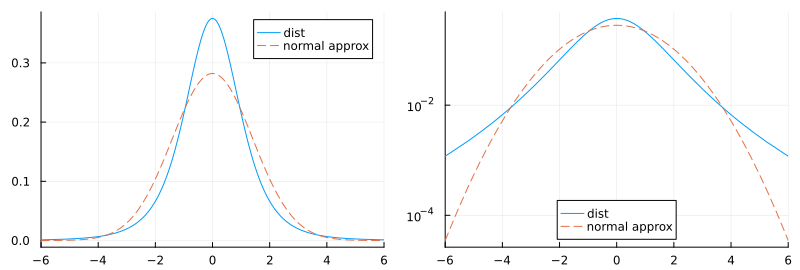

In [2]:
@show dist = TDist(4.0001)
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -6, 6

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b))

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b), yscale=:log10, legend=:bottom)

plot(P, Q; size=(800, 270))

dist = MixtureModel([TDist(4.0001) - 10, TDist(4.0001) + 10], [0.5, 0.5]) = MixtureModel{LocationScale{Float64, Continuous, TDist{Float64}}}(K = 2)
components[1] (prior = 0.5000): LocationScale{Float64, Continuous, TDist{Float64}}(
μ: -10.0
σ: 1.0
ρ: TDist{Float64}(ν=4.0001)
)

components[2] (prior = 0.5000): LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 10.0
σ: 1.0
ρ: TDist{Float64}(ν=4.0001)
)


mean(dist) = 0.0
std(dist) = 10.099502463116679
skewness(dist) = 0.0
kurtosis(dist) = 21.14458058577473


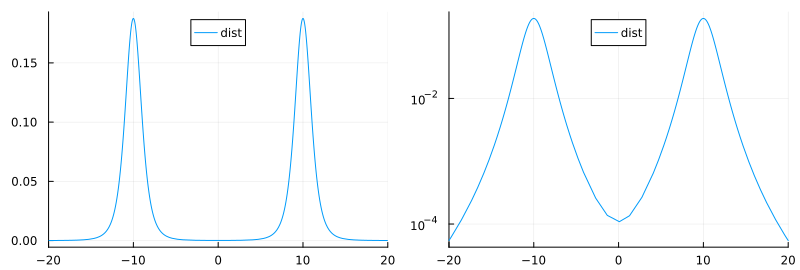

In [3]:
@show dist = MixtureModel([TDist(4.0001)-10, TDist(4.0001)+10], [0.5, 0.5])
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -20, 20

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(xlim=(a, b); legend=:top)

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(xlim=(a, b), yscale=:log10, legend=:top)

plot(P, Q; size=(800, 270))

dist = MixtureModel([TDist(4.0001) - 10, TDist(4.0001) + 10], [0.05, 0.95]) = MixtureModel{LocationScale{Float64, Continuous, TDist{Float64}}}(K = 2)
components[1] (prior = 0.0500): LocationScale{Float64, Continuous, TDist{Float64}}(
μ: -10.0
σ: 1.0
ρ: TDist{Float64}(ν=4.0001)
)

components[2] (prior = 0.9500): LocationScale{Float64, Continuous, TDist{Float64}}(
μ: 10.0
σ: 1.0
ρ: TDist{Float64}(ν=4.0001)
)


mean(dist) = 9.0
std(dist) = 4.582570239778096
skewness(dist) = -3.553846904082968
kurtosis(dist) = 556.5151232935394


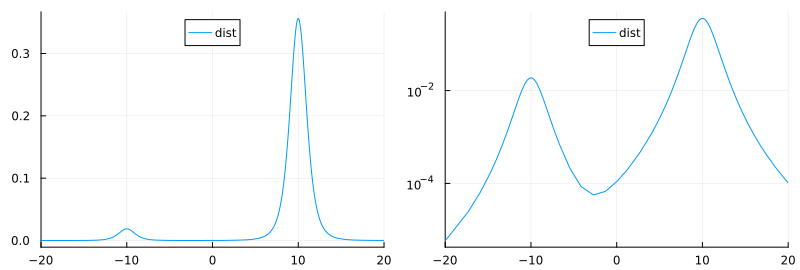

In [4]:
@show dist = MixtureModel([TDist(4.0001)-10, TDist(4.0001)+10], [0.05, 0.95])
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -20, 20

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(xlim=(a, b); legend=:top)

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(xlim=(a, b), yscale=:log10, legend=:top)

plot(P, Q; size=(800, 270))

dist = Laplace() = Laplace{Float64}(μ=0.0, θ=1.0)
mean(dist) = 0.0
std(dist) = 1.4142135623730951
skewness(dist) = 0.0
kurtosis(dist) = 3.0


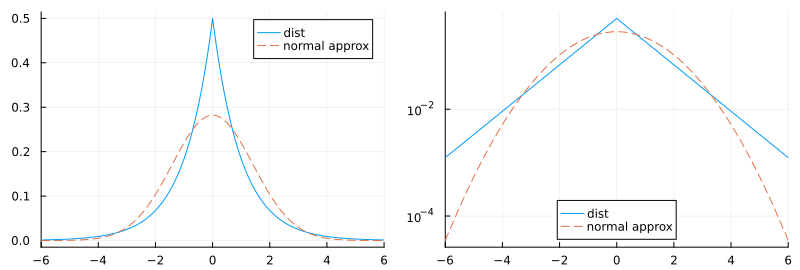

In [5]:
@show dist = Laplace()
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -6, 6

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b))

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b), yscale=:log10, legend=:bottom)

plot(P, Q; size=(800, 270))

dist = MixtureModel([TDist(4.0001), Laplace(0, 0.1)], [0.5, 0.5]) = MixtureModel{Distribution{Univariate, Continuous}}(K = 2)
components[1] (prior = 0.5000): TDist{Float64}(ν=4.0001)
components[2] (prior = 0.5000): Laplace{Float64}(μ=0.0, θ=0.1)

mean(dist) = 0.0
std(dist) = 1.0049751246921177
skewness(dist) = 0.0
kurtosis(dist) = 117638.3506449715


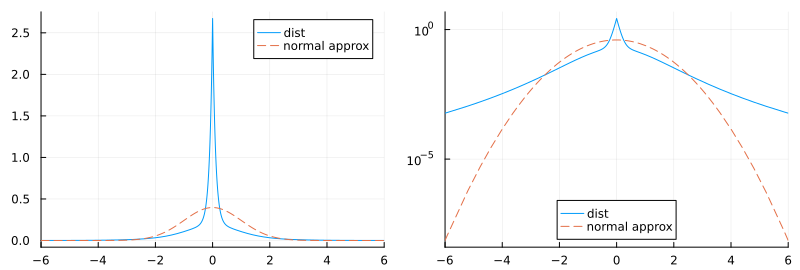

In [6]:
@show dist = MixtureModel([TDist(4.0001), Laplace(0, 0.1)], [0.5, 0.5])
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -6, 6

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b))

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b), yscale=:log10, legend=:bottom)

plot(P, Q; size=(800, 270))

dist = MixtureModel([TDist(4.0001), Laplace(0, 0.1)], [1.0, 0.0]) = MixtureModel{Distribution{Univariate, Continuous}}(K = 2)
components[1] (prior = 1.0000): TDist{Float64}(ν=4.0001)
components[2] (prior = 0.0000): Laplace{Float64}(μ=0.0, θ=0.1)

mean(dist) = 0.0
std(dist) = 1.414195885476929
skewness(dist) = 0.0
kurtosis(dist) = 60000.00000013984


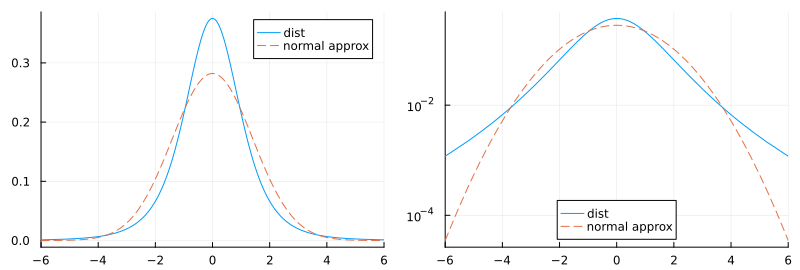

In [7]:
@show dist = MixtureModel([TDist(4.0001), Laplace(0, 0.1)], [1.0, 0.0])
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -6, 6

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b))

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b), yscale=:log10, legend=:bottom)

plot(P, Q; size=(800, 270))

dist = MixtureModel([TDist(4.0001), Laplace(0, 0.1)], [0, 1.0]) = MixtureModel{Distribution{Univariate, Continuous}}(K = 2)
components[1] (prior = 0.0000): TDist{Float64}(ν=4.0001)
components[2] (prior = 1.0000): Laplace{Float64}(μ=0.0, θ=0.1)

mean(dist) = 0.0
std(dist) = 0.14142135623730953
skewness(dist) = 0.0
kurtosis(dist) = 3.000000000000001


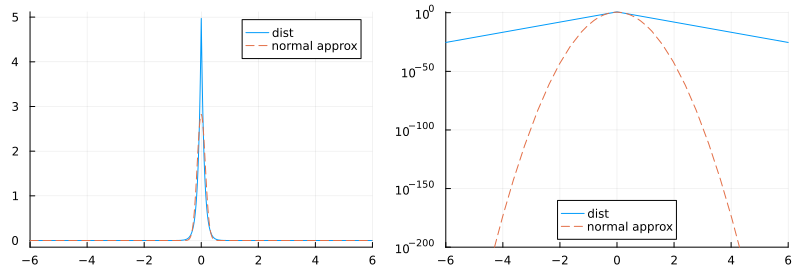

In [8]:
@show dist = MixtureModel([TDist(4.0001), Laplace(0, 0.1)], [0, 1.0])
@show mean(dist)
@show std(dist)
@show skewness(dist)
@show kurtosis(dist)

a, b = -6, 6

P = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b))

Q = plot(x -> pdf(dist, x), a, b; label="dist")
plot!(Normal(mean(dist), std(dist)), a, b; label="normal approx", ls=:dash)
plot!(xlim=(a, b), ylim=(1e-200, 6), yscale=:log10, legend=:bottom)

plot(P, Q; size=(800, 270))

In [9]:
ber = Bernoulli(0.5)
@show skewness(ber) kurtosis(ber);

skewness(ber) = 0.0
kurtosis(ber) = -2.0


In [10]:
ber = Bernoulli(0.0001)
@show skewness(ber) kurtosis(ber);

skewness(ber) = 99.98499937495625
kurtosis(ber) = 9995.00010001
